## Log Analysis

#### Notebook used to analize the results of the log crated when running the robot arm.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load the data

log_commands_og = pd.read_csv("log_commands.csv")
log_commands = log_commands_og.apply(lambda x: abs(x))
log_commands.describe()

,time,steps_j1,steps_j2,steps_j3,steps_j4,steps_j5,steps_j6
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,0.018465,5.934498,6.933406,44.033843,0.514192,4.426856,1.292576
std,0.016664,9.661601,7.010136,51.735413,1.308574,5.773323,1.974036
min,0.000870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003661,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000
50%,0.018723,3.000000,5.000000,30.000000,0.000000,2.000000,0.000000
75%,0.027109,8.000000,10.000000,58.000000,0.000000,6.000000,2.000000
max,0.200289,111.000000,74.000000,578.000000,9.000000,45.000000,12.000000


In [4]:
#Commands per second.

print("Commands sent per second",1/log_commands_og["time"].mean())

joint_means = [log_commands[f"steps_j{i+1}"].mean() for i in range(6)]
avg_step_per_command = sum(joint_means)/6
print("Average step for all joints",avg_step_per_command)
print("Average interval between commands in seconds: ",log_commands["time"].mean())

speeds = [1488,1071,4500,600,700,600] #steps per second

avg_speed = sum(speeds)/6
avg_completion_per_joint = []
for i in range(6):
    cur = log_commands[f"steps_j{i+1}"].mean()/speeds[i]
    avg_completion_per_joint.append(cur)
    
print("avg_speed ",avg_speed)
print("\n--- average number of steps sent to joint---\n")
_ =[print("Joint {} {:.4f} ".format(i+1,x)) for i,x in enumerate(joint_means)]
print("\n--- average completion time per joint---\n")

_ =[print("Joint {} {:.4f} ".format(i+1,x)) for i,x in enumerate(avg_completion_per_joint)]





Commands sent per second 54.1575936191903
Average step for all joints 10.522561863173216
Average interval between commands in seconds:  0.01846463133187768
avg_speed  1493.1666666666667

--- average number of steps sent to joint---

Joint 1 5.9345 
Joint 2 6.9334 
Joint 3 44.0338 
Joint 4 0.5142 
Joint 5 4.4269 
Joint 6 1.2926 

--- average completion time per joint---

Joint 1 0.0040 
Joint 2 0.0065 
Joint 3 0.0098 
Joint 4 0.0009 
Joint 5 0.0063 
Joint 6 0.0022 


In [5]:
log_angles_og = pd.read_csv("log_angles.csv")
log_angles = log_angles_og.apply(lambda x: abs(x))
log_angles.describe()

,time,angles_j1,angles_j2,angles_j3,angles_j4,angles_j5,angles_j6
count,916.000000,916.000000,9.160000e+02,9.160000e+02,9.160000e+02,916.000000,916.000000
mean,0.018465,0.002670,5.405217e-03,7.766155e-03,3.410029e-03,0.005493,0.006798
std,0.016664,0.004121,5.150061e-03,9.032726e-03,5.410591e-03,0.006485,0.007828
min,0.000870,0.000000,1.804112e-16,2.775558e-16,2.775558e-17,0.000000,0.000030
25%,0.003661,0.000062,1.810577e-03,1.930556e-03,6.204791e-04,0.001475,0.001604
50%,0.018723,0.001584,4.239703e-03,5.403501e-03,1.518337e-03,0.003326,0.003716
75%,0.027109,0.003385,7.479294e-03,1.019705e-02,3.395183e-03,0.007109,0.008983
max,0.200289,0.047013,5.450164e-02,1.009401e-01,3.803798e-02,0.051349,0.049648


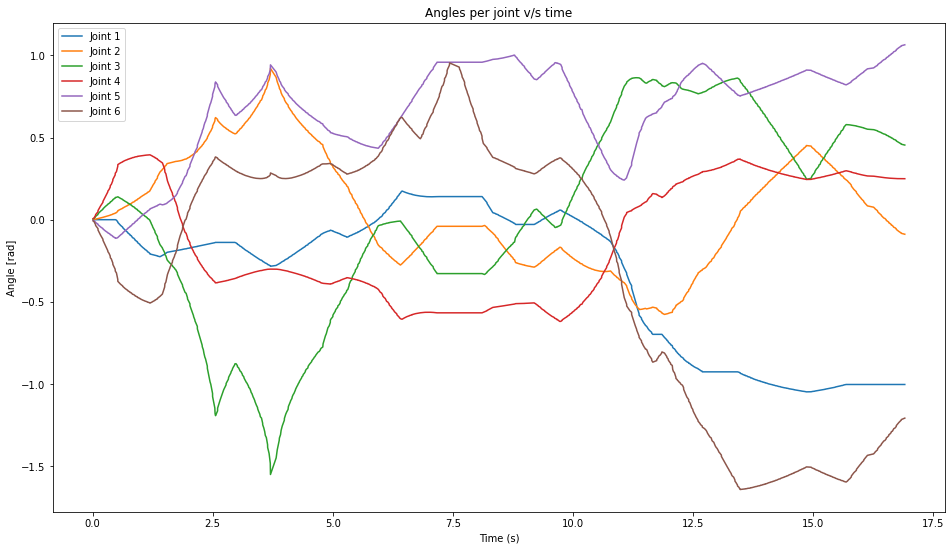

In [6]:
log_angles_cum = log_angles_og.cumsum()
plt.figure(figsize=(16, 9))

for i in range(6):
    plt.plot(log_angles_cum["time"],log_angles_cum[f"angles_j{i+1}"],label = f"Joint {i+1}")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle [rad]")
plt.title("Angles per joint v/s time")

plt.show()


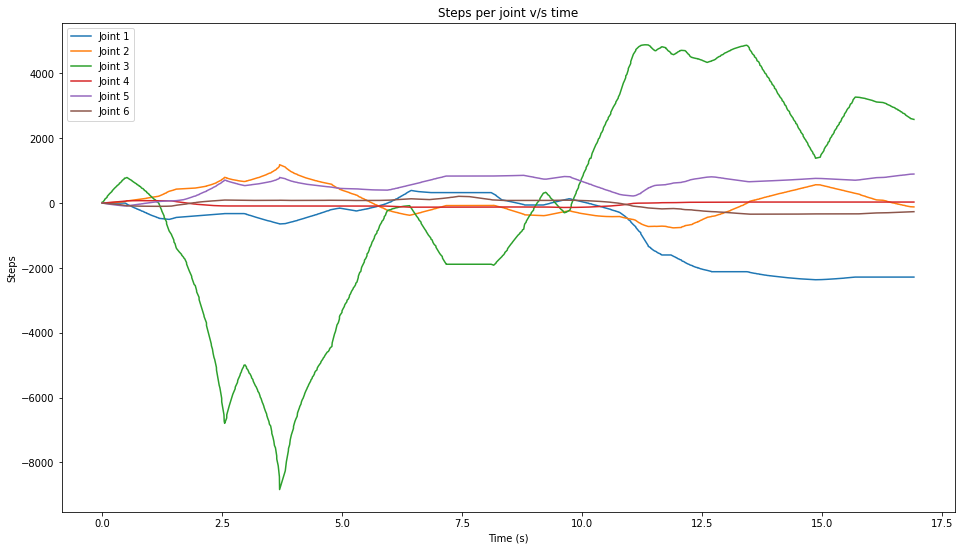

In [7]:
log_commands_cum = log_commands_og.cumsum()
plt.figure(figsize=(16, 9))

for i in range(6):
    plt.plot(log_commands_cum["time"],log_commands_cum[f"steps_j{i+1}"],label = f"Joint {i+1}")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Steps")
plt.title("Steps per joint v/s time")
plt.show()